In [372]:
# Video Game Sales Analysis 

# Description:
#- Understanding video game sales and predicting it

# Model Type 
### KNN, XGB, Decision Tree, Random Forest, MLP Regressor, Linear Regression
#30/10/2022

# Version - V1.0 Beta

# Goals:
#- To understand the Global video game sales
#- Understand the Top Publishers
#- Understand the Top Genres
#- Understand Sales by Continent 
#- Predict Sales 

# Key Insights and Notes
#- 


# Fixes
#-


# Version Updates:
#- 


# Future Implementations: 
#- Analyse data with Google Data 



# Author - Luiz Gabriel Bongiolo

#Credits and References 
#- Code used to scrape the data - https://github.com/GregorUT/vgchartzScrape

In [373]:
#Dataset description

# This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

# Rank - Ranking of overall sales

# Name - The games name

# Platform - Platform of the games release (i.e. PC,PS4, etc.)

# Year - Year of the game's release

# Genre - Genre of the game

# Publisher - Publisher of the game

# NA_Sales - Sales in North America (in millions)

# EU_Sales - Sales in Europe (in millions)

# JP_Sales - Sales in Japan (in millions)

# Other_Sales - Sales in the rest of the world (in millions)

# Global_Sales - Total worldwide sales.

In [374]:
#Import Labraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.simplefilter("ignore")


In [375]:
df = pd.read_csv("/home/semrival/Documents/Python Programs /Portfolio/Video Game Sales /vgsales.csv")

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [376]:
#Checking the data

df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [377]:
#Check all lines that have a Null value
#We can use this to filter missing values and evaluate if they are relevant or if we can fix it 


df[df.isnull().any(axis = 1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [378]:
#Let's fill the missing year values with fowardfill 

df['Year'] = df['Year'].fillna(method="ffill")



In [379]:
#Converting the Yeart o Integer Type

integer_year = {'Year': 'int'}
df['Year'] = df['Year'].astype(integer_year)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [380]:
#Check again 
df[df.isnull().any(axis = 1)]

#Now we can decide if we can eliminate all this values or keep some of them 
#For examble, wwe Smackdown vs. Raw 2006 has 3M Global Sales, is this relevant? It might...
#Since the publisher might not be relevant for some of the analysis we are doing, we might consider to keep this values 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,2007,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,2008,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,2008,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [381]:
#Lets remove all missing values 

df = df.dropna(axis=0)

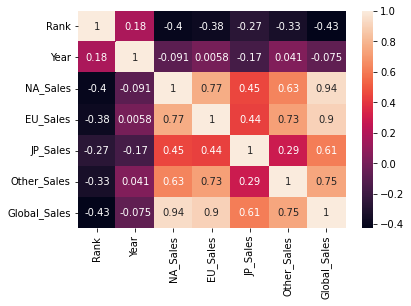

In [382]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [383]:
top_sales = df.sort_values(by=['Global_Sales'], ascending=False).head(10)

top_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


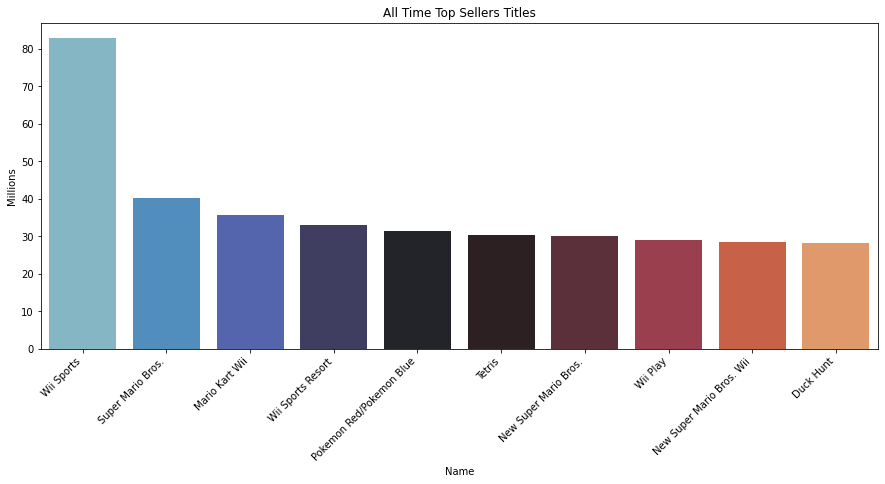

In [384]:
#Check Best Selling games of all time 

ax=plt.figure(figsize=(15,6))
sns.barplot(x="Name",y="Global_Sales", data=top_sales, palette='icefire')
plt.ylabel("Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('All Time Top Sellers Titles')

plt.show()

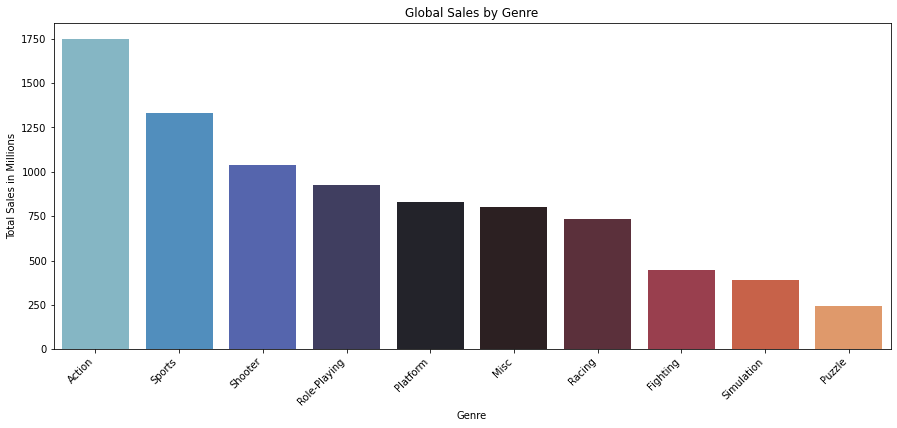

In [385]:
#Best Selling Genres 

top_genres = df.groupby(["Genre"]).agg({'Global_Sales':'sum'}).reset_index()

top_genres = top_genres.sort_values(by=["Global_Sales"], ascending=False).head(10)



bx=plt.figure(figsize=(15,6))
sns.barplot(x="Genre",y="Global_Sales", data=top_genres, palette='icefire')
plt.ylabel("Total Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Global Sales by Genre')

plt.show()

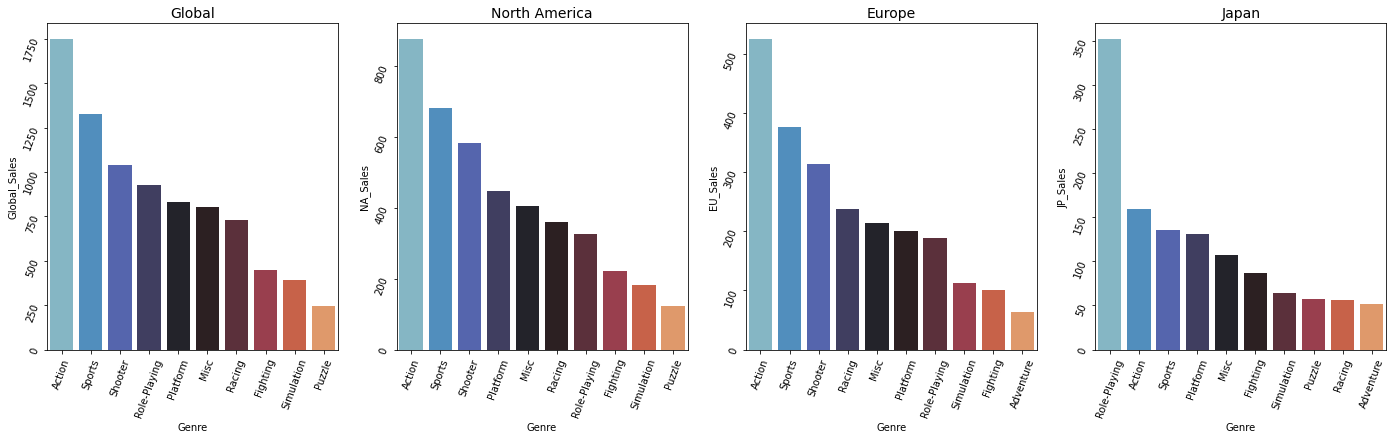

In [386]:
#Plot all Charts in One 

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (24, 6))

sns.barplot(x="Genre",y="Global_Sales", ax=ax1, data=top_genres, palette='icefire').set_title("Global", fontsize = 14)
ax1.tick_params(labelrotation=70)

top_genresNA = df.groupby(["Genre"]).agg({'NA_Sales':'sum'}).reset_index()
top_genresNA = top_genresNA.sort_values(by=["NA_Sales"], ascending=False).head(10)

sns.barplot(x="Genre",y="NA_Sales", ax=ax2, data=top_genresNA, palette='icefire', ci=None).set_title("North America", fontsize = 14)
ax2.tick_params(labelrotation=70)

top_genresEU = df.groupby(["Genre"]).agg({'EU_Sales':'sum'}).reset_index()
top_genresEU = top_genresEU.sort_values(by=["EU_Sales"], ascending=False).head(10)

sns.barplot(x="Genre",y="EU_Sales", ax=ax3, data=top_genresEU, palette='icefire', ci=None).set_title("Europe", fontsize = 14)
ax3.tick_params(labelrotation=70)

top_genresJP = df.groupby(["Genre"]).agg({'JP_Sales':'sum'}).reset_index()
top_genresJP = top_genresJP.sort_values(by=["JP_Sales"], ascending=False).head(10)

sns.barplot(x="Genre",y="JP_Sales", ax=ax4, data=top_genresJP, palette='icefire', ci=None).set_title("Japan", fontsize = 14)
ax4.tick_params(labelrotation=70)




In [387]:
#Sort by year and platform Global Sales 

top_platforms = df.sort_values( by="Year", ascending=False)
top_platforms.set_index("Year", inplace=True)
#top_platforms = df.sort_values( by="Global_Sales", ascending=[False]).head(10)
top_platforms.reset_index(inplace=True)
top_platforms = top_platforms.groupby(["Year","Platform"]).agg({'Global_Sales':'sum'}).reset_index()


#Last 10 Years Platform Global Sales 
top_platforms[80:180]



,Year,Platform,Global_Sales
80,1997,PC,11.26
81,1997,PS,136.24
82,1997,PS2,5.23
83,1997,SAT,6.77
84,1997,SNES,0.99
...,...,...,...
175,2005,X360,8.64
176,2005,XB,49.17
177,2006,2600,0.27
178,2006,DS,121.22


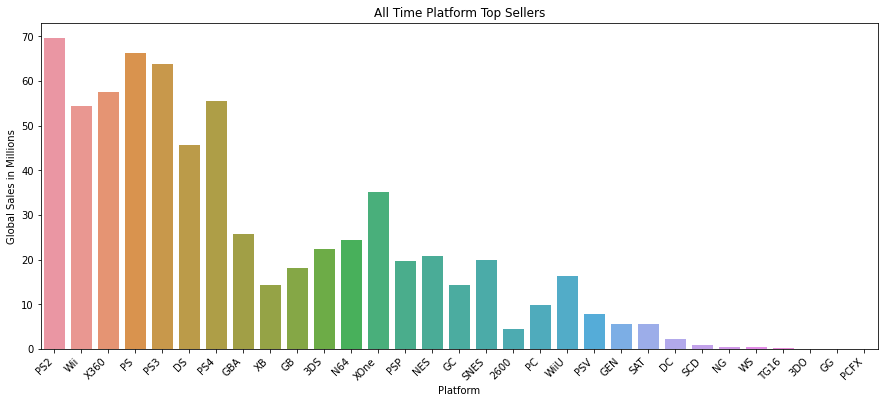

In [388]:
#All Time platform Global Sales 

top_platforms = top_platforms.sort_values( by="Global_Sales", ascending=False)

cx=plt.figure(figsize=(15,6))
sns.barplot(x="Platform",y="Global_Sales", data=top_platforms, ci=None)
plt.ylabel("Global Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("All Time Platform Top Sellers")


plt.show()

Text(0.5, 1.0, 'All time Publisher Top Seller')

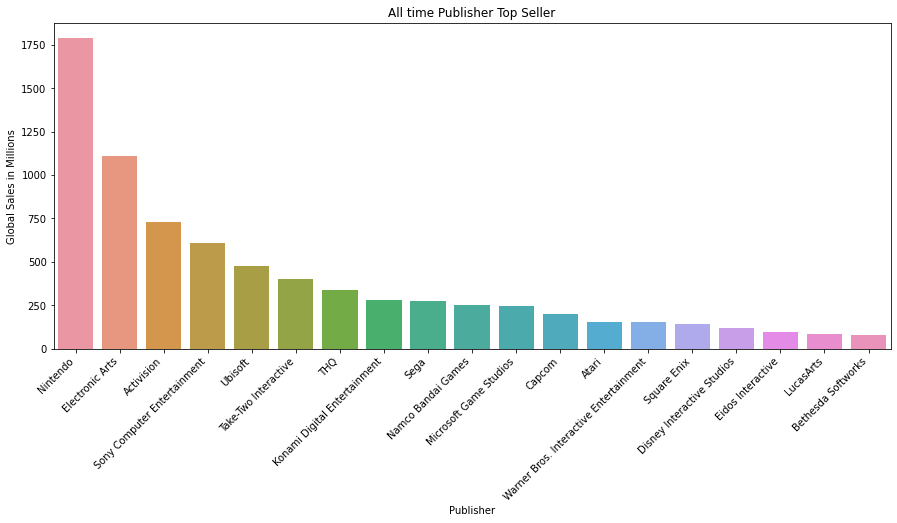

In [389]:
#All time Publisher Top seller


top_publisher = df.groupby(["Publisher"]).agg({'Global_Sales':'sum'}).reset_index()

top_publisher = top_publisher.sort_values(by="Global_Sales", ascending=False)


dx=plt.figure(figsize=(15,6))
sns.barplot(x="Publisher",y="Global_Sales", data=top_publisher[:19], ci=None)
plt.ylabel("Global Sales in Millions")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("All time Publisher Top Seller")



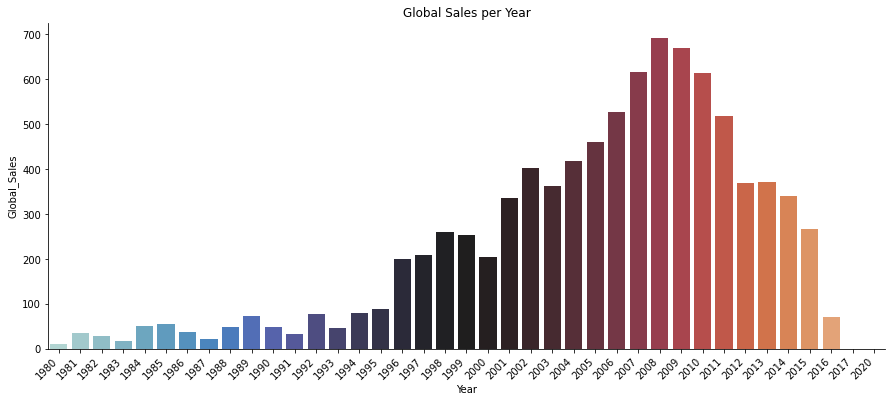

In [390]:
#Global Sales per Year

year = df.groupby(["Year"]).agg({'Global_Sales':'sum'}).reset_index()
year = year.sort_values(by="Global_Sales", ascending=False)


dx = plt.figure(figsize=(15,6))
sns.barplot(x="Year",y="Global_Sales", data=year, palette='icefire')
plt.title("Global Sales per Year")
plt.xticks(rotation=45, horizontalalignment='right')
sns.despine()

In [391]:
#Platform Global Sales per year

platform_year = df.groupby(["Platform","Year"]).agg({'Global_Sales':'sum'}).reset_index()


#Picking an specific platform 
platform_year[122:144]

,Platform,Year,Global_Sales
122,NES,1990,15.74
123,NES,1991,6.11
124,NES,1992,1.98
125,NES,1993,3.61
126,NES,1994,0.11
127,NG,1993,0.21
128,NG,1994,0.80
129,NG,1995,0.33
130,NG,1996,0.10
131,PC,1985,0.03


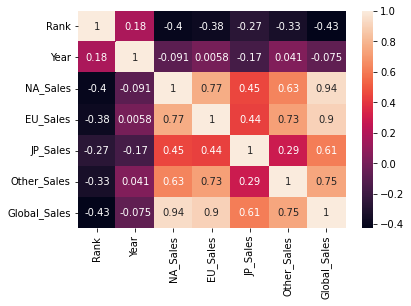

In [392]:
sns.heatmap(df.corr(),annot=True)
plt.show()

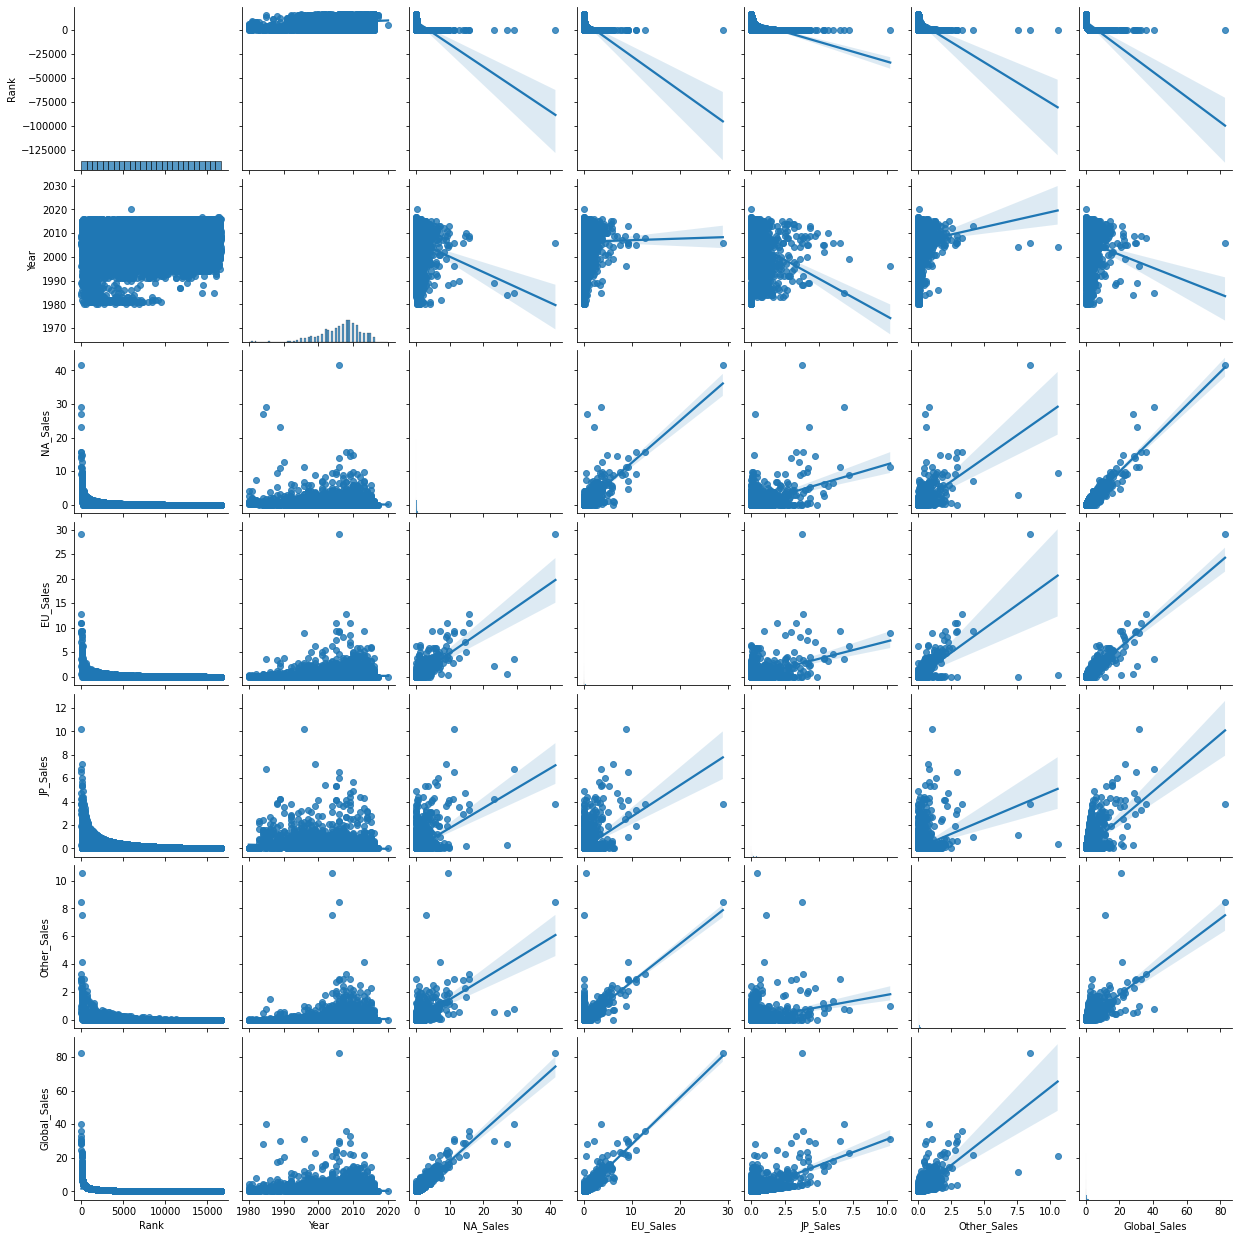

In [393]:
sns.pairplot(df, palette = "light:#5A9", kind="reg") 
plt.show()

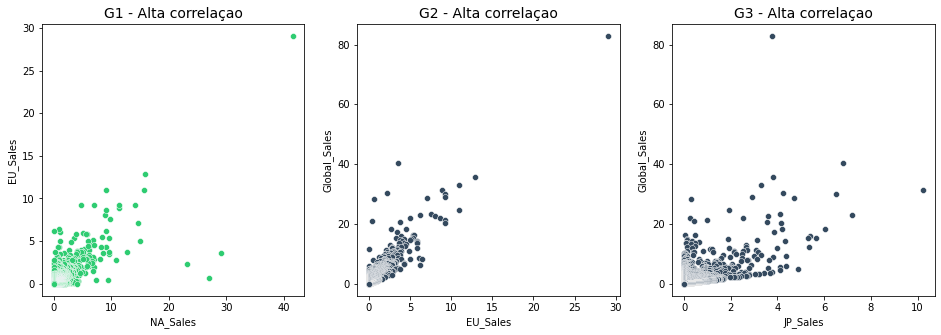

In [394]:
# Checking specific Correlations 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 5))

sns.scatterplot("NA_Sales", "EU_Sales"
                , data = df, ax = ax1, color = "#2ecc71").set_title("G1 - Alta correlaçao", fontsize = 14);
sns.scatterplot("EU_Sales", "Global_Sales"
                , data = df, ax = ax2, color = "#34495e").set_title("G2 - Alta correlaçao", fontsize = 14);
sns.scatterplot("JP_Sales", "Global_Sales"
                , data = df, ax = ax3, color = "#34495e").set_title("G3 - Alta correlaçao", fontsize = 14);
plt.show();

In [395]:
#Creating a new df just with usefull information 


df_clean = df.drop(["Rank","Name","Genre","Publisher", "Platform"], axis=1)

df_clean = df_clean.sort_values(["Year"])

df_clean

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,1980,0.22,0.01,0.00,0.00,0.24
2669,1980,0.72,0.04,0.00,0.01,0.77
258,1980,4.00,0.26,0.00,0.05,4.31
1766,1980,1.07,0.07,0.00,0.01,1.15
5366,1980,0.32,0.02,0.00,0.00,0.34
...,...,...,...,...,...,...
16260,2016,0.01,0.00,0.00,0.00,0.01
16438,2017,0.00,0.00,0.01,0.00,0.01
14390,2017,0.00,0.00,0.03,0.00,0.03
16241,2017,0.00,0.00,0.01,0.00,0.01


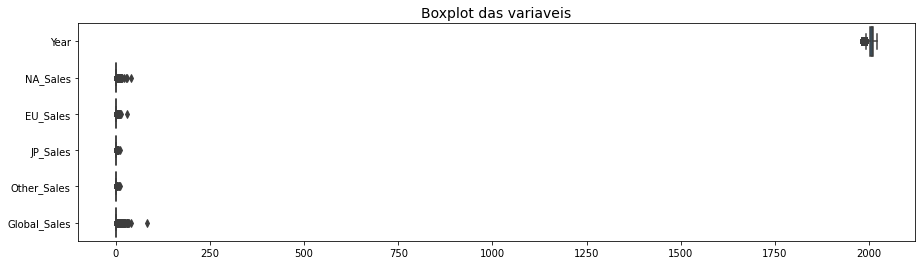

In [396]:
# O mesmo seria válido para o boxplot

plt.figure(figsize = (15, 4))
sns.boxplot(data = df_clean, orient = "h").set_title("Boxplot das variaveis", fontsize = 14)
plt.show()

In [397]:
# Como o DBSCAN é sensível à dimensionalidade, vamos padronizar os dados

# Inicializa o scaler
scaler = StandardScaler()

# Padroniza o df sem NaNs
df_padronizado = scaler.fit_transform(df_clean)

# Converte o array padronizado de volta para um dataframe
# com as mesmas colunas do outro
df_padronizado = pd.DataFrame(df_padronizado, columns = df_clean.columns)

df_padronizado

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,-4.532692,-0.055116,-0.270460,-0.251777,-0.255151,-0.191621
1,-4.532692,0.556203,-0.211184,-0.251777,-0.202205,0.148695
2,-4.532692,4.566454,0.223501,-0.251777,0.009578,2.421748
3,-4.532692,0.984126,-0.151909,-0.251777,-0.202205,0.392695
4,-4.532692,0.067148,-0.250701,-0.251777,-0.255151,-0.127410
...,...,...,...,...,...,...
16535,1.646836,-0.311869,-0.290218,-0.251777,-0.255151,-0.339305
16536,1.818490,-0.324096,-0.290218,-0.219497,-0.255151,-0.339305
16537,1.818490,-0.324096,-0.290218,-0.154938,-0.255151,-0.326463
16538,1.818490,-0.324096,-0.290218,-0.219497,-0.255151,-0.339305


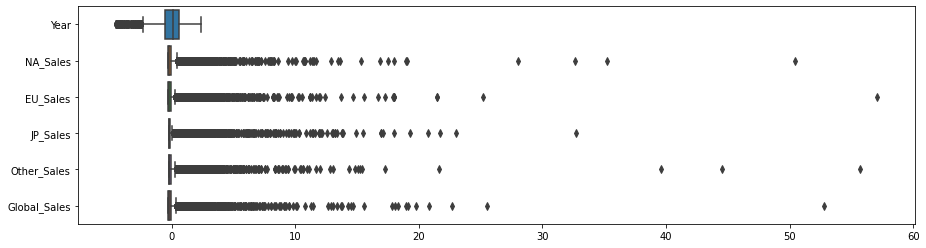

In [398]:
# Se repetimos a visualização do boxplot, vemos o efeito da padronização 
# que esta com média zero e desvio padrão 1

plt.figure(figsize = (15,4))
sns.boxplot(data = df_padronizado, orient = "h")
plt.show()

In [399]:
y = df_clean['Global_Sales'].copy()

x = df_clean.drop(['Global_Sales'], axis=1)

In [400]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8)

In [401]:
from sklearn.neighbors import KNeighborsRegressor

kRange = range(1,15,1)
scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    regressor_knn.fit(xtrain,ytrain)
    ypred = regressor_knn.predict(xtest)
rmse_knn = math.sqrt(mean_squared_error(ytest, ypred))
scoreknn=r2_score(ytest, ypred)


print('r2-scor',f'{r2_score(ytest, ypred):.2f}')
print(f"Root Mean Squared Error of the model : {rmse_knn:.3f}")

r2-scor 0.90
Root Mean Squared Error of the model : 0.417


In [402]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)
ypredxgb = xgb.predict(xtest)
rmse_xgp = math.sqrt(mean_squared_error(ytest, ypredxgb))
scorexgb=r2_score(ytest, ypredxgb)

print('r2-scor',r2_score(ytest, ypredxgb))
print(f"Root Mean Squared Error of the model : {rmse_xgp:.3f}")


r2-scor 0.9646176270501636
Root Mean Squared Error of the model : 0.254


In [403]:
import numpy as np
dtr = DecisionTreeRegressor(random_state=32)
dtr.fit(xtrain, ytrain)

ypred = dtr.predict(xtest)
rmse_dtr = math.sqrt(mean_squared_error(ytest, ypred))
scoredtr=r2_score(ytest, ypred)
print('r2-score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error of the model : {rmse_dtr:.3f}")

r2-score 0.9495859924408196
Root Mean Squared Error of the model : 0.303


In [404]:
rfr = RandomForestRegressor(random_state= 10)
rfr.fit(xtrain, ytrain)
ypred = rfr.predict(xtest)
rmse_rfr = math.sqrt(mean_squared_error(ytest, ypred))
scorerfr=r2_score(ytest, ypred)

print('r2-score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error of the model : {rmse_rfr:.3f}")

r2-score 0.9802197486398911
Root Mean Squared Error of the model : 0.190


In [405]:
mlp=MLPRegressor()
mlp.fit(xtrain, ytrain)
ypred = mlp.predict(xtest)
rmse_mlp = math.sqrt(mean_squared_error(ytest, ypred))
scoremlp=r2_score(ytest, ypred)

print('r2-score',r2_score(ytest, ypred))
print(f"Root Mean Squared Error of the model : {rmse_mlp:.3f}")

r2-score 0.9994622904881999
Root Mean Squared Error of the model : 0.031


Root Mean Squared Error of the model : 0.005
r2-scor 0.99998489781779


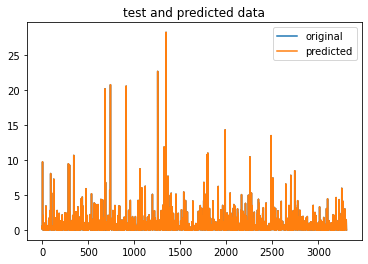

In [406]:
lnr= LinearRegression()
lnr.fit(xtrain, ytrain)
ypred = lnr.predict(xtest)
rmse_lnr = math.sqrt(mean_squared_error(ytest, ypred))
scorelnr=(r2_score(ytest, ypred))
print(f"Root Mean Squared Error of the model : {rmse_lnr:.3f}")
print('r2-scor',r2_score(ytest, ypred))
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("test and predicted data")
plt.legend()
plt.show()

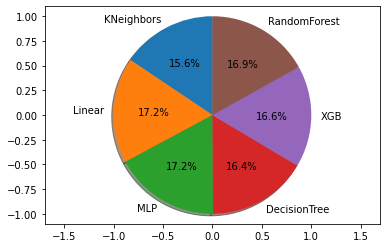

In [407]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels_acc = 'KNeighbors', 'Linear', 'MLP', 'DecisionTree','XGB','RandomForest'
acc = [scoreknn,  scorelnr, scoremlp,scoredtr,scorexgb,scorerfr]
explode = (0, 0,0,0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(acc, explode=explode, labels=labels_acc, autopct='%1.1f%%',
        shadow=True, startangle=90, frame=True)
ax1.axis('equal') 
plt.show()

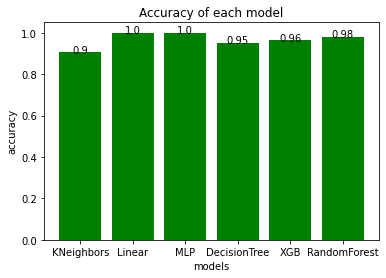

In [408]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,  y[i], y[i], ha = 'center')

if __name__ == '__main__':
    x = ['KNeighbors', 'Linear', 'MLP', 'DecisionTree','XGB','RandomForest']
    y = [scoreknn,  scorelnr, scoremlp,scoredtr,scorexgb,scorerfr]
    y_=[float(f'{scoreknn:.2f}'),float(f'{scorelnr:.2f}'),float(f'{scoremlp:.2f}'),float(f'{scoredtr:.2f}'), float(f'{scorexgb:.2f}'),float(f'{scorerfr:.2f}')] 
    plt.bar(x, y,color='green')
    addlabels(x, y_)
    plt.title("Accuracy of each model")
    plt.xlabel("models")
    plt.ylabel("accuracy")
    plt.show()

